Name

Labpartner(s)

In [2]:
#import statements go here
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Class 11.2

#### Announcements

- Please message me and Victoria for coding help on slack, or your lab partners, or just post in the #coding_questions channel and we can all work together (#coding_questions is the best plan, you all often have the same/similar questions, and it makes folks feel good when they can help others). August needs a break and he is too nice to say no.

- Lots of cool animations on Monday! If you missed it, watch the recording. Lots of tips on how to make movies easier than I showed you.

- Today we are going to have a workday. For lecture I will talk about what makes a good scientific proposal, then you can use the lab period to work on your proposal or what you will. We are skipping the History of Hacking. You can do some research on your own.

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day Thursday 4/1 (tomorrow) to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.


# Warmups 11.2

**W.1. (and finish for practice for this week)**
Get the movie dataset from lab 10.2 and load it into pandas. We want to finish what I started, answering the question if gross earnings is related to budget. Pull these two variables out and do a linear regression on them. You will probably have to clean them up by removing NaNs first using the methods you learned in datacamp.
Write a sentance or two describing the result of your regression analysis and what it means, that is discuss your results. How confident are you in your model, does budget predict earnings?

In [3]:
#importing movies and making it into a dataframe 
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3]) 
#concatenate sheets to make them into 1 dataframe 

In [4]:
movies 

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


In [5]:
#drop any nans in the budget and gross earnings 
movies_dropna = movies.dropna(subset =["Budget", "Gross Earnings"])

In [6]:
movies_dropna["Gross Earnings"]

Title
Over the Hill to the Poorhouse       3000000.0
Metropolis                             26435.0
The Broadway Melody                  2808000.0
42nd Street                          2300000.0
Top Hat                              3000000.0
                                      ...     
The Young Messiah                    6462576.0
Triple 9                            12626905.0
Warcraft                            46978995.0
X-Men: Apocalypse                  154985087.0
Zoolander 2                         28837115.0
Name: Gross Earnings, Length: 3891, dtype: float64

In [7]:
from scipy import stats

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies_dropna["Budget"],movies_dropna["Gross Earnings"])

In [9]:
slope

0.032071572781839926

In [10]:
intercept

49605030.51283432

In [11]:
r_value

0.10217945351303392

In [12]:
p_value 

1.676127655795583e-10

(0.0, 800000000.0)

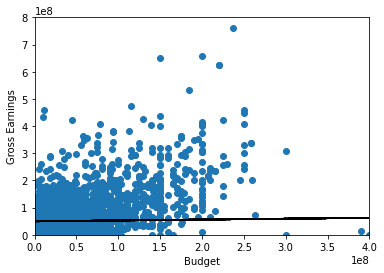

In [14]:
# let's plot the data with the linear fit and see how it looks
plt.plot(movies_dropna["Budget"], slope*movies_dropna["Budget"]+intercept, 'k--') # y = mx+b
plt.scatter(movies_dropna["Budget"], movies_dropna["Gross Earnings"])
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.xlim([0,0.04E10])#x limit
plt.ylim([0,.8E9])#y limit

Try OLS

In [15]:
import statsmodels.api as sm

In [16]:
X = movies_dropna["Budget"]
Y = movies_dropna["Gross Earnings"]

In [17]:
X = sm.add_constant(X)

In [18]:
X

,const,Budget
Title,,
Over the Hill to the Poorhouse,1.0,100000.0
Metropolis,1.0,6000000.0
The Broadway Melody,1.0,379000.0
42nd Street,1.0,439000.0
Top Hat,1.0,609000.0
...,...,...
The Young Messiah,1.0,18500000.0
Triple 9,1.0,20000000.0
Warcraft,1.0,160000000.0


In [19]:
model = sm.OLS(Y, X).fit()

In [21]:
model.params

const     4.960503e+07
Budget    3.207157e-02
dtype: float64

In [22]:
predictions = model.predict(X)

(0.0, 800000000.0)

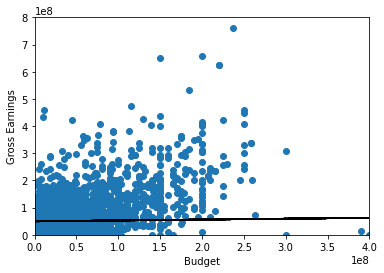

In [24]:
plt.plot(X["Budget"],predictions, 'k--')
plt.scatter(movies_dropna["Budget"],movies_dropna["Gross Earnings"])
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.xlim([0,0.04E10])#x limit
plt.ylim([0,.8E9])#y limit

# Lecture 11.2

### Agenda:
- What makes a good scientific research proposal?
    - Dataset or way to generate data to analyze (e.g. a model)
    - Well defined research question(s) that can be adressed with the above dataset/methods
    - Clear explaination of what you are going to do to answer these research questions (not too technical/jargony, but some details)
    - Convince the reader/reviewer you have the expertise and the resources to do the work (don't promise more than you can do)
    - Realistic timelines and adequate personell 
    
#### On Monday you will give a 5 min talk on your proposed research 
Just a couple of slides and some discussion

- What makes a good talk?

# Lab 11.2

Today is a workday. Catch up and work on your research proposal. I am here to assist you.

**E.1** Complete your research proposal (see assignment and checklist in folder in github)

**E.2** On Monday we will workshop research proposal plans together. This should be fun, helpful, and not too formal/serious. Prepare a few slides (2-3) on your proposed research to share with the class. Talk about your research question(s) and your proposed methods and we will ask you questions and give you feedback.

Please note both of these exercises are manditory to pass the class and must be completed on time (no late work will be accepted)